# Climate vs EV_sales

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib
import seaborn as sns

In [5]:
path_EV = '../Processed_Data/Ev_sales.csv'
path_climate = '../Processed_Data/climate_state.csv'
path_income = '../Processed_Data/incomes.csv'

In [6]:
df_EV = pd.read_csv(path_EV).sort_values('State').set_index('State').drop(columns=['Unnamed: 0'])
df_climate = pd.read_csv(path_climate).drop(columns=['Unnamed: 0'])
df_income = pd.read_csv(path_income).sort_values('GeoName').set_index('GeoName').drop(columns=['Unnamed: 0'])

In [7]:
col = ['State','temp','EV_sale']
data = pd.DataFrame(columns = col)
data['State']=df_income.index
data = data.set_index('State')
data['temp'] = df_climate.iloc[29]
data['EV_sale']=df_EV['2019']
data = data.drop(['District of Columbia','Hawaii'])
data.head()

,temp,EV_sale
State,,
Alabama,65.4,1007
Alaska,32.2,143
Arizona,60.3,7591
Arkansas,61.2,538
California,58.4,145020


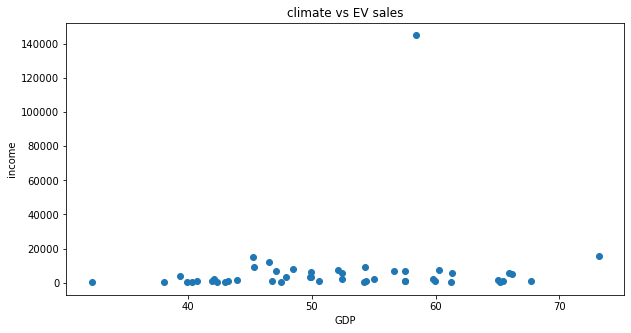

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.ticklabel_format(style='plain')
plt.scatter(data['temp'],data['EV_sale'])
plt.title("climate vs EV sales")
plt.xlabel("GDP")
plt.ylabel("income")
plt.show()

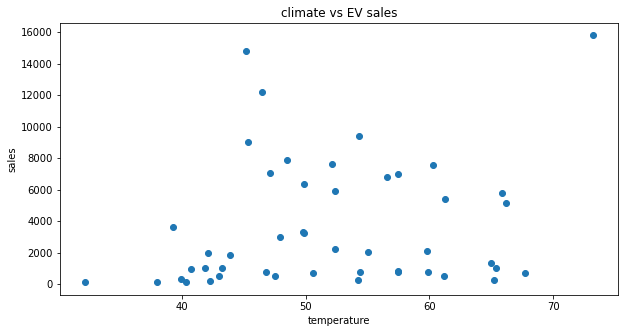

In [9]:
data = data.drop('California')
fig, ax = plt.subplots(figsize=(10, 5))
ax.ticklabel_format(style='plain')
plt.scatter(data['temp'],data['EV_sale'])
plt.title("climate vs EV sales")
plt.xlabel("temperature")
plt.ylabel("sales")
plt.show()